In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [12]:
df = pd.read_csv("./Datasets/monthly-milk-production-pounds-p.csv")
y = df['Milk']

# Autocorrelation

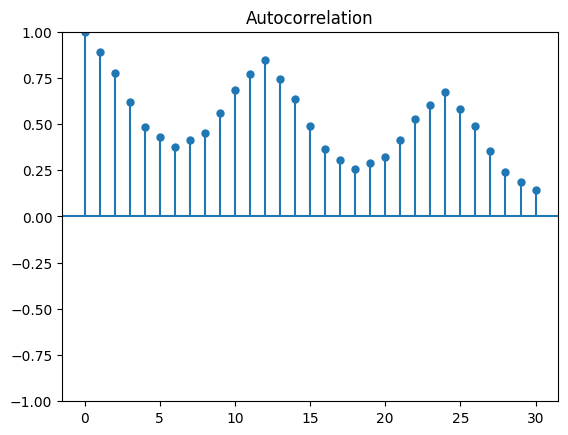

In [13]:
plot_acf(y, lags=30, alpha=None)
plt.show()

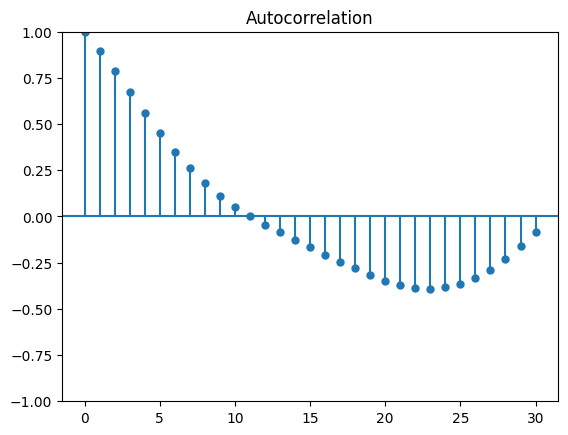

In [14]:
wgem = pd.read_csv("./Datasets/WGEM-IND_CPTOTNSXN.csv")
plot_acf(wgem['Value'], lags=30, alpha=None)
plt.show()

# Arima

In [15]:
from statsmodels.tsa.arima.model import ARIMA
from numpy import sqrt
from sklearn.metrics import mean_squared_error as mse

In [16]:
milk = pd.read_csv("./Datasets/monthly-milk-production-pounds-p.csv")
milk.head()

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [17]:
y = milk['Milk']
y_train, y_test = y.iloc[:-12], y.iloc[-12:]
y_train.shape, y_test.shape

((156,), (12,))

c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


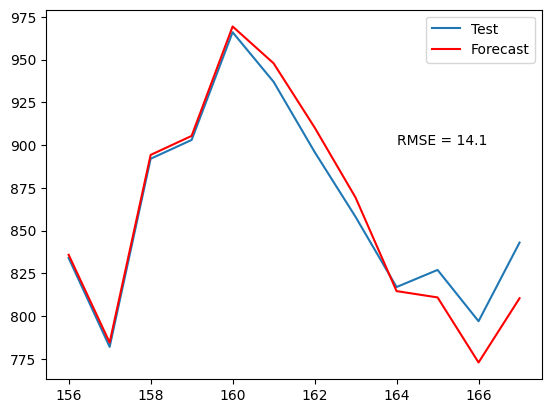

In [24]:
lag_p = 13
model = ARIMA(y_train, order=(lag_p,0,0))
model_fit = model.fit()
predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)
y_test.plot(label ='Test')
predictions.plot(color='red', label='Forecast')
rmse = sqrt(mse(y_test, predictions))
plt.text(164,900,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

# Simple Moving Average (MA) model


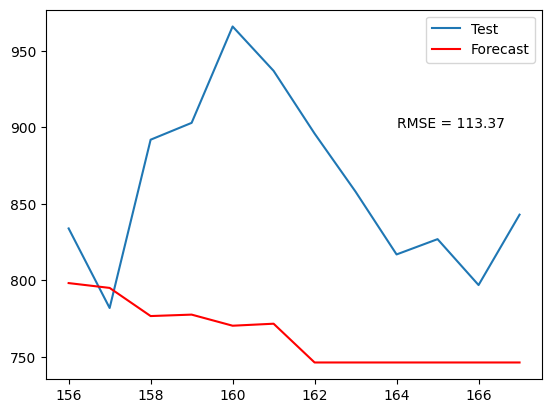

In [27]:
lag_q = 6
model = ARIMA(y_train, order=(0,0,lag_q))
model_fit = model.fit()
predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)
y_test.plot(label ='Test')
predictions.plot(color='red', label='Forecast')
rmse = sqrt(mse(y_test, predictions))
plt.text(164,900,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

# ARMA model
AutoRegression with moving Average

c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


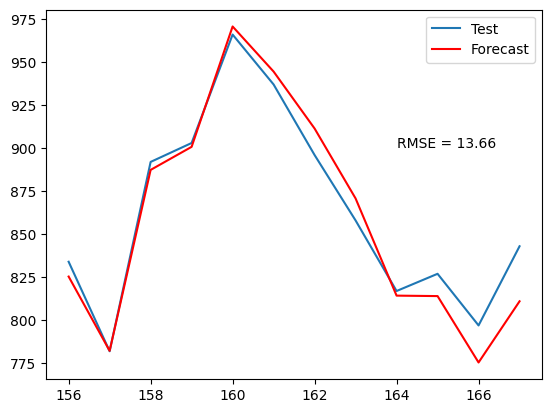

In [33]:
lag_p, lag_q = 12,6
model = ARIMA(y_train, order=(lag_p,0,lag_q))
model_fit = model.fit()
predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)
y_test.plot(label ='Test')
predictions.plot(color='red', label='Forecast')
rmse = sqrt(mse(y_test, predictions))
plt.text(164,900,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

# ARIMA

c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


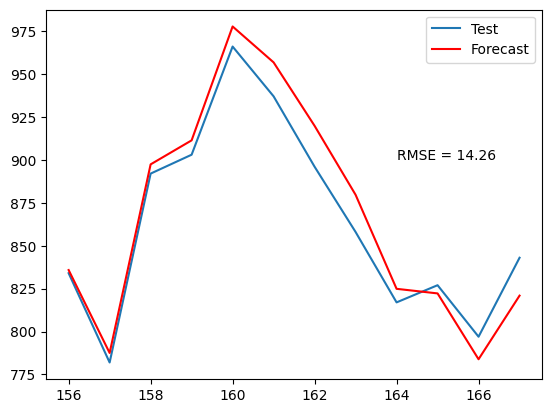

In [34]:
lag_p, lag_d, lag_q = 12,1,6
model = ARIMA(y_train, order=(lag_p,lag_d,lag_q))
model_fit = model.fit()
predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)
y_test.plot(label ='Test')
predictions.plot(color='red', label='Forecast')
rmse = sqrt(mse(y_test, predictions))
plt.text(164,900,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

# PMDARIMA


In [36]:
from pmdarima.arima import auto_arima

In [39]:
model = auto_arima(y_train, trace=True, error_action='ignore' , suppress_warnings=True)
forecast = model.predict(n_periods=len(y_test))





# model_fit = model.fit()
# predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)
# y_test.plot(label ='Test')
# predictions.plot(color='red', label='Forecast')
# rmse = sqrt(mse(y_test, predictions))
# plt.text(164,900,"RMSE = "+ str(np.round(rmse,2)))
# plt.legend(loc='best')
# plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1593.690, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1624.299, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1626.095, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1626.164, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1622.458, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1604.395, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1618.644, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1572.502, Time=0.54 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1562.233, Time=0.48 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 s

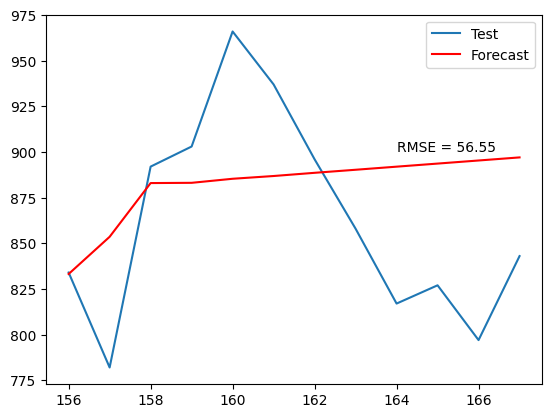

In [40]:

y_test.plot(label ='Test')
forecast.plot(color='red', label='Forecast')
rmse = sqrt(mse(y_test, forecast))
plt.text(164,900,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

# SARIMA

In [41]:
model = auto_arima(y_train, trace=True, error_action='ignore' , suppress_warnings=True, seasonal=True, m=12)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1000.136, Time=1.55 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1218.095, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1015.855, Time=0.21 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1104.312, Time=0.23 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1349.320, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=998.169, Time=0.74 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1038.230, Time=0.23 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1000.125, Time=1.73 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1012.395, Time=0.60 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=3.20 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=996.457, Time=0.43 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1036.989, Time=0.13 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=998.423, Time=0.57 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=998.411, Time=1.01 sec
 ARIMA(1,0,2)(1,1,0)[12] int

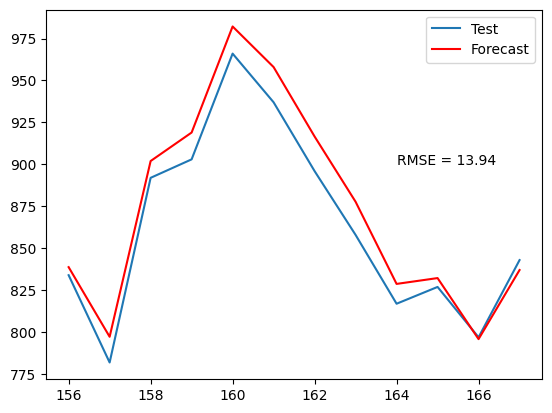

In [42]:
forecast = model.predict(n_periods=len(y_test))

y_test.plot(label ='Test')
forecast.plot(color='red', label='Forecast')
rmse = sqrt(mse(y_test, forecast))
plt.text(164,900,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

## Traffic Fatalities dataset

In [43]:
traffic = pd.read_csv("./Datasets/monthly-traffic-fatalities-in-on.csv", sep=';')
traffic.head()

,Month,fatalities
0,1960-01,61
1,1960-02,65
2,1960-03,55
3,1960-04,56
4,1960-05,91


In [55]:
y = traffic['fatalities']
y_train = y.iloc[:-12]
y_test = y.iloc[-12:]

In [56]:
model = auto_arima(y_train, trace=True, error_action='ignore' , suppress_warnings=True)
forecast = model.predict(n_periods=len(y_test))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1585.839, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1586.576, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1587.171, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1587.504, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1584.643, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1587.437, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.884 seconds


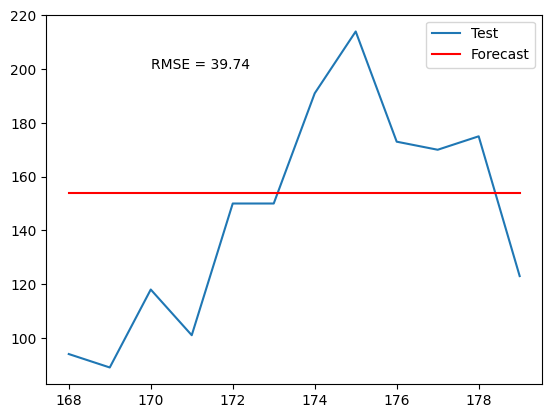

In [57]:
# Arima
y_test.plot(label ='Test')
forecast.plot(color='red', label='Forecast')
rmse = sqrt(mse(y_test, forecast))
plt.text(170,200,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

In [58]:
model = auto_arima(y_train, trace=True, error_action='ignore' , suppress_warnings=True, seasonal=True, m=12)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1586.576, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1529.884, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1557.310, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1584.643, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1587.171, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1516.360, Time=0.56 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1542.216, Time=0.27 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1513.576, Time=0.62 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1529.581, Time=0.26 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=1492.844, Time=0.45 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : 

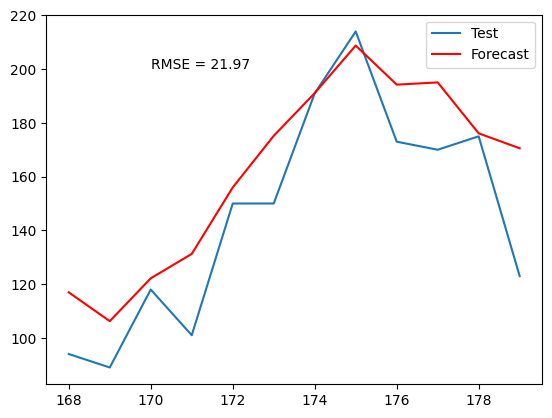

In [59]:
forecast = model.predict(n_periods=len(y_test))

y_test.plot(label ='Test')
forecast.plot(color='red', label='Forecast')
rmse = sqrt(mse(y_test, forecast))
plt.text(170,200,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

## MOnthly beer production dataset

In [60]:
beer = pd.read_csv("./Datasets/monthly-beer-production-in-austr.csv")
beer.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [63]:
y = beer['Monthly beer production']
y_train = y.iloc[:-12]
y_test = y.iloc[-12:]

In [64]:
model = auto_arima(y_train, trace=True, error_action='ignore' , suppress_warnings=True)
forecast = model.predict(n_periods=len(y_test))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3952.461, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4070.292, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4047.060, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4037.367, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4068.306, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4013.976, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4028.080, Time=0.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3953.392, Time=0.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3954.005, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3957.114, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3960.438, Time=0.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3958.799, Time=0.41 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3953.794, Time=0.21 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] i

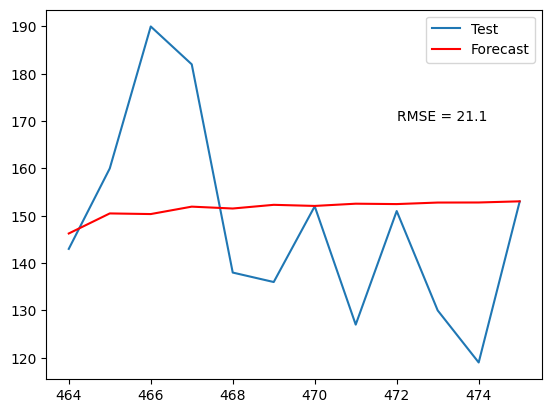

In [68]:
# Arima
y_test.plot(label ='Test')
forecast.plot(color='red', label='Forecast')
rmse = sqrt(mse(y_test, forecast))
plt.text(472,170,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

In [69]:
model = auto_arima(y_train, trace=True, error_action='ignore' , suppress_warnings=True, seasonal=True, m=12)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=3468.442, Time=2.71 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4070.292, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3807.869, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3839.739, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4068.306, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=3799.097, Time=0.80 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=2.47 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=3476.283, Time=6.48 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=3467.010, Time=4.74 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=3715.554, Time=2.50 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=5.08 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=4.35 sec
 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(3,1,2)(1,0,2)[12] intercept   : AIC=3468.955, Time=5.77 sec
 ARIMA(2,1,3)(1,0,2)[12] intercept   : A

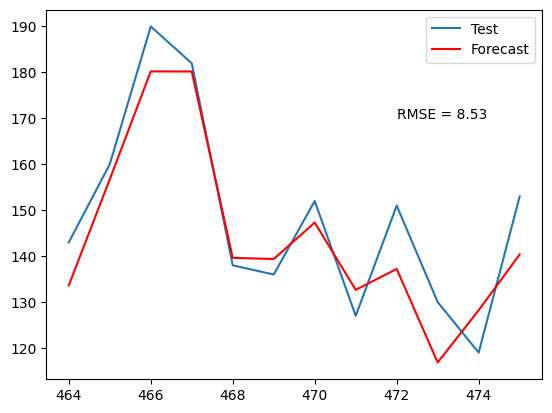

In [70]:
forecast = model.predict(n_periods=len(y_test))

y_test.plot(label ='Test')
forecast.plot(color='red', label='Forecast')
rmse = sqrt(mse(y_test, forecast))
plt.text(472,170,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

In [71]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing


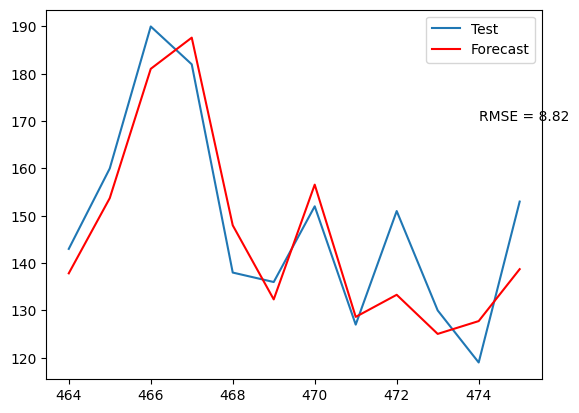

In [74]:
alpha, beta, gamma = 0.5,0.02,0.6
hw = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add')
fit1 = hw.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(label ='Test')
fcast1.plot(color='red', label='Forecast')
rmse = sqrt(mse(y_test, fcast1))
plt.text(474,170,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

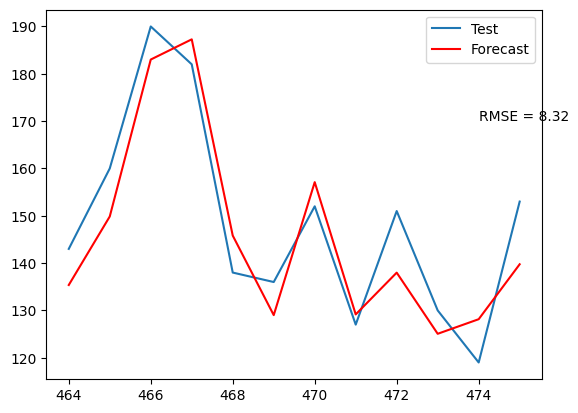

In [76]:
alpha, beta, gamma = 0.75,0.02,0.6
hw = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul')
fit1 = hw.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(label ='Test')
fcast1.plot(color='red', label='Forecast')
rmse = sqrt(mse(y_test, fcast1))
plt.text(474,170,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

Downsampling to Quarter

In [77]:
beer = pd.read_csv("./Datasets/monthly-beer-production-in-austr.csv", index_col=0)
beer.index = pd.to_datetime(beer.index).to_period('M')

In [80]:
downsampled = beer.resample('Q').mean()
downsampled.index.rename('Quarter', inplace=True)
downsampled.columns = ['Quarterly beer production']

<Axes: xlabel='Quarter'>

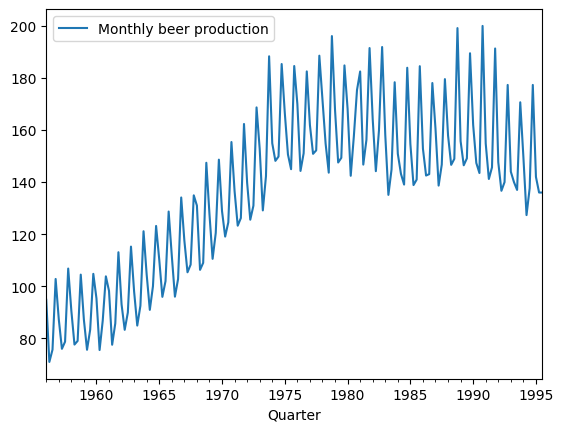

In [79]:
downsampled.plot()

In [82]:
y = downsampled['Quarterly beer production']
y_train = y.iloc[:-4]
y_test = y.iloc[-4:]

In [112]:
model = auto_arima(y_train, trace=True, error_action='ignore' , suppress_warnings=True, seasonal=True, m=4)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[4]             : AIC=942.333, Time=3.81 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=1094.938, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=1000.635, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=956.198, Time=0.08 sec
 ARIMA(2,1,2)(0,1,1)[4]             : AIC=940.520, Time=0.23 sec
 ARIMA(2,1,2)(0,1,0)[4]             : AIC=973.447, Time=0.11 sec
 ARIMA(2,1,2)(0,1,2)[4]             : AIC=941.756, Time=0.22 sec
 ARIMA(2,1,2)(1,1,0)[4]             : AIC=968.934, Time=0.11 sec
 ARIMA(2,1,2)(1,1,2)[4]             : AIC=942.411, Time=0.38 sec
 ARIMA(1,1,2)(0,1,1)[4]             : AIC=938.522, Time=0.39 sec
 ARIMA(1,1,2)(0,1,0)[4]             : AIC=986.575, Time=0.12 sec
 ARIMA(1,1,2)(1,1,1)[4]             : AIC=940.334, Time=0.19 sec
 ARIMA(1,1,2)(0,1,2)[4]             : AIC=940.218, Time=0.18 sec
 ARIMA(1,1,2)(1,1,0)[4]             : AIC=970.765, Time=0.09 sec
 ARIMA(1,1,2)(1,1,2)[4]             : AIC=inf

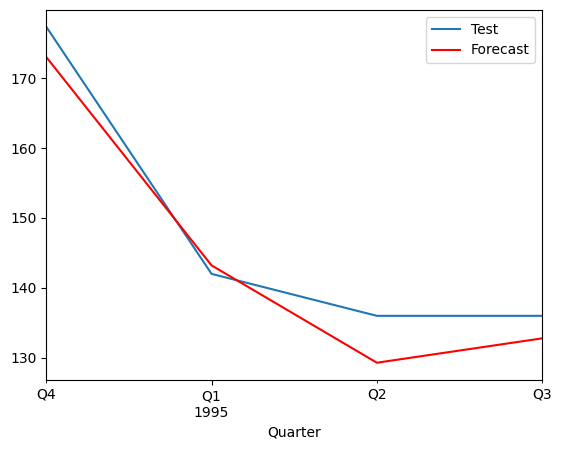

In [113]:
forecast = model.predict(n_periods=len(y_test))

y_test.plot(label ='Test')
forecast.plot(color='red', label='Forecast')
rmse = sqrt(mse(y_test, forecast))
# plt.text(0, 0,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

In [114]:
rmse

4.344154366459649

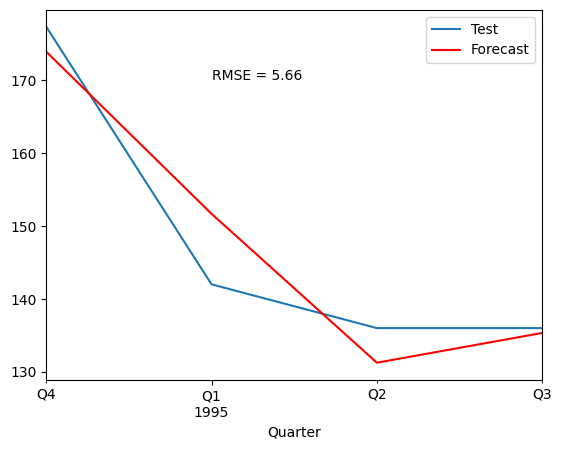

In [115]:
alpha, beta, gamma = 0.75,0.02,0.6
hw = ExponentialSmoothing(y_train, seasonal_periods=4, trend='add', seasonal='mul')
fit1 = hw.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(label ='Test')
fcast1.plot(color='red', label='Forecast')
rmse = sqrt(mse(y_test, fcast1))
plt.text(100,170,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

In [109]:
rmse

2.9159922145262116